

# Project: Investigate a Dataset - [TMDb movie dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project we explore the the TMDb movie data to identify and investigate patterns and relationsships between/among the features in the data that can help draw meaningful conclusions.

### Dataset Description 
The dataset has 10866 entries and 21 columns. Below are column names and what they  represent.

 1.  id  --------------     unique index of each movie 
 
 2.  imdb_id  ----------- ----imdb index 

 3.  popularity  ----------- ---measure of how polular a movie is
 
 4.   budget  ------------- amount of money spent on the movie    
 
 5.   revenue------------- amount of money made from the movie     
  
 6.   original_title -------- movie title
 
 7.   cast ----------- actors in the movie   
 
 8.   homepage --------------- webpage of the movie   
 
 9.   director ---------------movie director 
 
 10.   tagline ------------- slogan of the movie
 
 11.  keywords----------- keywords in the movie     
 
 12.  overview -------------- blurb of the movie
 
 13.  runtime ------------- length of the movie in mimutes      
 
 14.  genres ------- the style categories that the movie falls into       
 
 15.  production_companies--------   company that produced the movie 
 
 16.  release_date --------------- when the movie was released
 
 17.  vote_count ----------- number of people who liked the movie       
 
 18.  vote_average ------------ average of vote count          
 
 19.  release_year ---------- the year the movie was realeased
 
 20.  budget_adj ------ movie budget in terms of 2010 dollars
 
 21.  revenue_adj -------- movie revenuw in terms of 2010 dollars
 

### Question(s) for Analysis

1. Which genres are most popular from year to year?


2. What kinds of properties are associated with movies that have high revenues?

To investigate  the dataset, we need to use some python packages which we import:

In [1]:
# importing libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

We would assess the data using some numpy and pandas commands.

First we load the data.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#types and look for instances of missing or possibly errant data.
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [4]:
#checking the size
movie_data.shape

(10866, 21)

In [5]:
#checking the nature of values in the columns
movie_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# removing columns that are not needed
nmovie_data=movie_data.drop(['id', 'imdb_id', 'homepage', 'overview', 'tagline', 'keywords'],axis=1)
nmovie_data.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [7]:
#uniqe values in each column
nmovie_data.nunique()

popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
director                 5067
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
 nmovie_data.shape

(10866, 15)

In [9]:
# information about the dataset
nmovie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

In [10]:
#summary statistics of the data
nmovie_data.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  10866.000000   
mean       0.646441  1.462570e+07  3.982332e+07    102.070863    217.389748   
std        1.000185  3.091321e+07  1.170035e+08     31.381405    575.619058   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.207583  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.383856  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.713817  1.500000e+07  2.400000e+07    111.000000    145.750000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean       5.974922   2001.322658  1.755104e+07  5.136436e+07  
std        0.935142     12.812941  3.430616e+07  1.446325e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%        6.600000   2011.000000  2.085325e+07  3.369710e+07  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

#### Results from assessing the movie dataset

The movie dataset has 10866 entries and 21 columns. 5 of the columns have integer type values, 4 have float type values and the rest have string or object type values.

The unique values in each column vary from 56 to 10865.

Additionally, from the information about the data, we see that columns named; **homepage, tagline, keywords, overview, genres** and **production_companies** have missing values. 


The summary statistics of the numerical 




### Data Cleaning
The next step is to clean the data. We look out for the following:

> **missing values:**  from assessment, the data has a number of missing values in 6 of its columns. However these columns are object type so we can not use the mean to fill in the missing values, so they could be dropped. When all the missing values are dropped the entries in the dataset reduce to 1992 entries



In [11]:
#dropping missing values
nmovie_data=nmovie_data.dropna()
nmovie_data.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

> **incorrect datatypes:**  all the columns of the dataset are in have the appropriate data type format so there is no need to make changes.

>**duplicates:** there is one duplicate in the dataset. We check and remove it using the code below:


In [12]:
#duplicates
sum(nmovie_data.duplicated())

1

In [13]:
#drop duplicates
nmovie_data.drop_duplicates(inplace=True)

In [14]:
nmovie_data.shape

(9772, 15)

<a id='eda'></a>
## Exploratory Data Analysis

In this section we explore the patterns of individual varables and the relationships between variables. We do this by posing questions and finding answeres from visualizations.



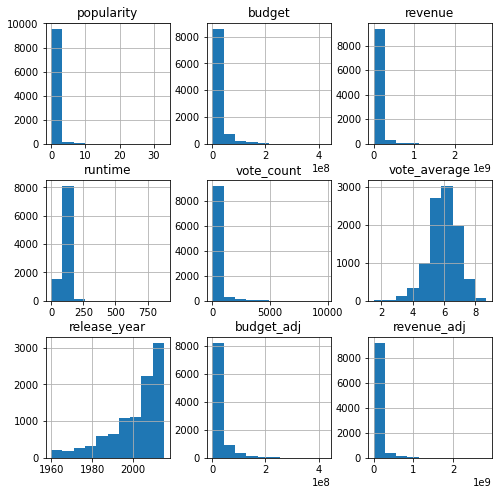

In [15]:
nmovie_data.hist(figsize= (8,8));

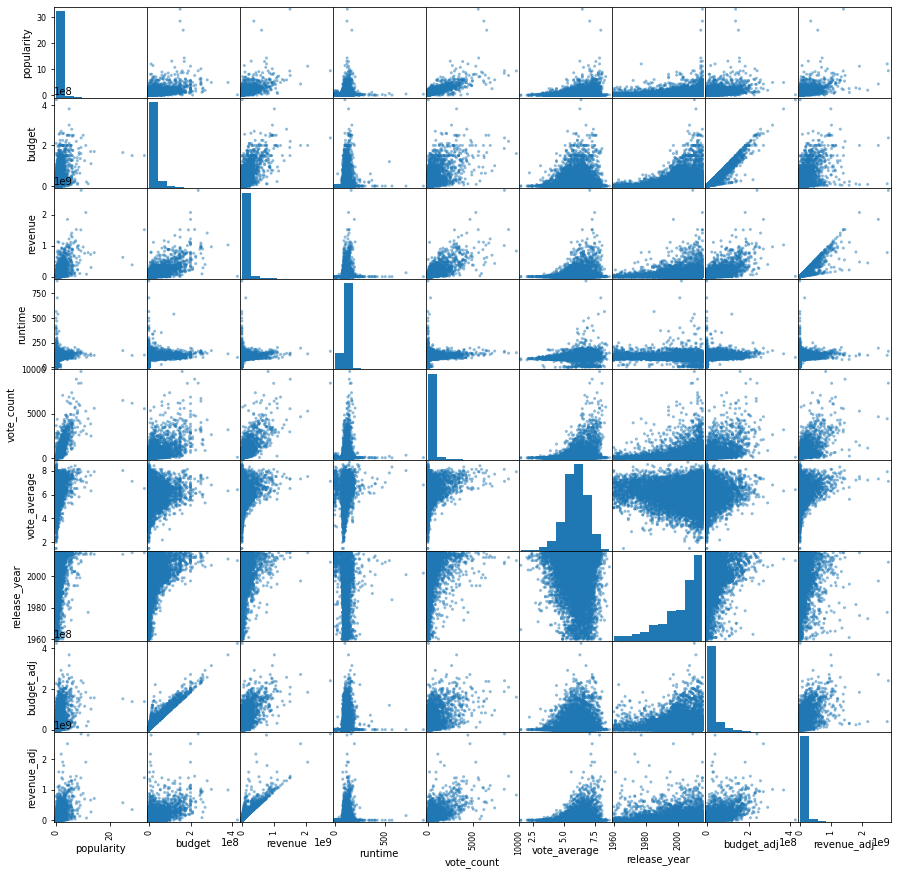

In [16]:
pd.plotting.scatter_matrix(nmovie_data, figsize = (15,15));

In [17]:
nmovie_data.corr()

popularity    budget   revenue   runtime  vote_count  \
popularity      1.000000  0.538921  0.662405  0.156290    0.802956   
budget          0.538921  1.000000  0.731204  0.214292    0.627068   
revenue         0.662405  0.731204  1.000000  0.183293    0.788533   
runtime         0.156290  0.214292  0.183293  1.000000    0.184285   
vote_count      0.802956  0.627068  0.788533  0.184285    1.000000   
vote_average    0.239121  0.096051  0.192026  0.193973    0.279851   
release_year    0.110944  0.138239  0.071738 -0.133793    0.124726   
budget_adj      0.505378  0.968315  0.702365  0.249134    0.580444   
revenue_adj     0.606458  0.616327  0.918032  0.198307    0.704044   

              vote_average  release_year  budget_adj  revenue_adj  
popularity        0.239121      0.110944    0.505378     0.606458  
budget            0.096051      0.138239    0.968315     0.616327  
revenue           0.192026      0.071738    0.702365     0.918032  
runtime           0.193973     -0.133793    0.249134     0.198307  
vote_count        0.279851      0.124726    0.580444     0.704044  
vote_average      1.000000     -0.140046    0.109789     0.214668  
release_year     -0.140046      1.000000    0.036102    -0.056305  
budget_adj        0.109789      0.036102    1.000000     0.640852  
revenue_adj       0.214668     -0.056305    0.640852     1.000000

### Research Question 1 ( relationship b/n popularity and budget)

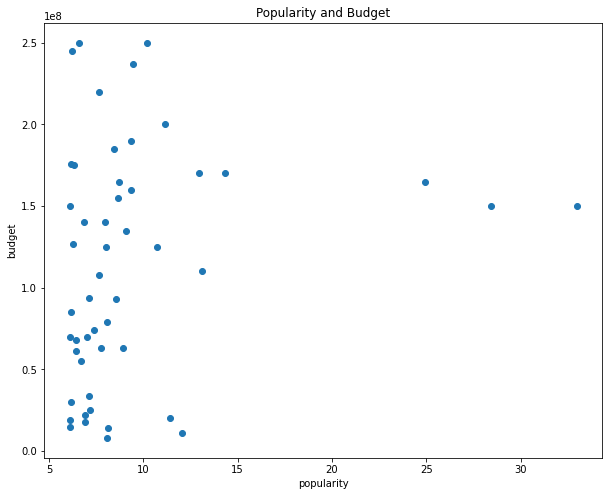

In [18]:
nmovies=nmovie_data.sort_values(by=['popularity'], ascending =False).head(50)
plt.figure(figsize=(10,8))
plt.scatter(x= 'popularity', y= 'budget', data= nmovies)
plt.xlabel("popularity")
plt.ylabel("budget")
plt.title("Popularity and Budget")
plt.show()

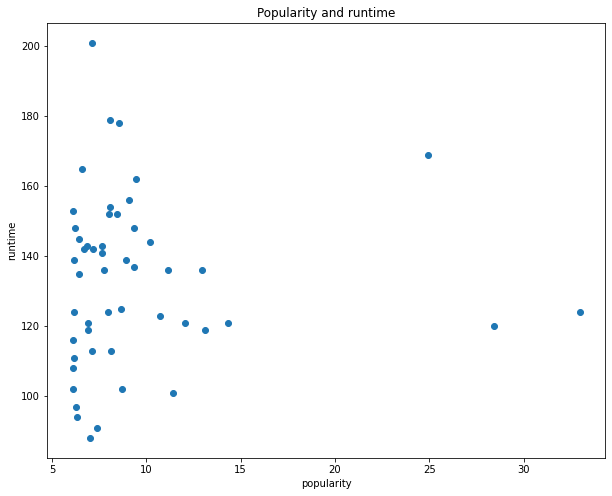

In [19]:
nmovies=nmovie_data.sort_values(by=['popularity'], ascending =False).head(50)
plt.figure(figsize=(10,8))
plt.scatter(x= 'popularity', y= 'runtime', data= nmovies)
plt.xlabel("popularity")
plt.ylabel("runtime")
plt.title("Popularity and runtime")
plt.show()

In [20]:
nmovie_data

popularity     budget     revenue                original_title  \
0       32.985763  150000000  1513528810                Jurassic World   
1       28.419936  150000000   378436354            Mad Max: Fury Road   
2       13.112507  110000000   295238201                     Insurgent   
3       11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4        9.335014  190000000  1506249360                     Furious 7   
...           ...        ...         ...                           ...   
10861    0.080598          0           0            The Endless Summer   
10862    0.065543          0           0                    Grand Prix   
10863    0.065141          0           0           Beregis Avtomobilya   
10864    0.064317          0           0        What's Up, Tiger Lily?   
10865    0.035919      19000           0      Manos: The Hands of Fate   

                                                    cast            director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...     Colin Trevorrow   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...       George Miller   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...    Robert Schwentke   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...         J.J. Abrams   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...           James Wan   
...                                                  ...                 ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...         Bruce Brown   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...  John Frankenheimer   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      Eldar Ryazanov   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...         Woody Allen   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...    Harold P. Warren   

       runtime                                     genres  \
0          124  Action|Adventure|Science Fiction|Thriller   
1          120  Action|Adventure|Science Fiction|Thriller   
2          119         Adventure|Science Fiction|Thriller   
3          136   Action|Adventure|Science Fiction|Fantasy   
4          137                      Action|Crime|Thriller   
...        ...                                        ...   
10861       95                                Documentary   
10862      176                     Action|Adventure|Drama   
10863       94                             Mystery|Comedy   
10864       80                              Action|Comedy   
10865       74                                     Horror   

                                    production_companies release_date  \
0      Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1      Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2      Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3              Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4      Universal Pictures|Original Film|Media Rights ...       4/1/15   
...                                                  ...          ...   
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

       vote_count  vote_average  release_year    budget_adj   revenue_adj  
0            5562           6.5          2015  1.379999e+08  1.392446e+09  
1            6185           7.1          2015  1.379999e+08  3.481613e+08  
2            2480           6.3          2015  1.012000e+08  2.716190e+08  
3            5292           7.5          2015  1.839999e+08  1.902723e+09  
4            2947           7.3          2015  1.747999e+08  1.385749e+09  
...           ...           ...           ...           ...           ...  
10861          

<AxesSubplot:xlabel='release_year'>

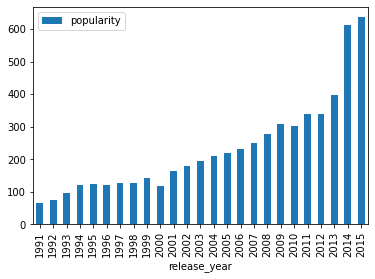

In [21]:
temp = nmovie_data.groupby('release_year').sum().reset_index().tail(25)
temp.plot.bar(x='release_year',y='popularity')

In [22]:
temp2

NameError: name 'temp2' is not defined

In [ ]:
temp2 = nmovie_data.groupby('genres').sum().reset_index()

In [ ]:
L = {}
for (elm1,elm2) in temp2[['genres','popularity']].values:
    splt = elm1.split('|')
    for elm3 in splt:
        if (elm3 not in L):
            L[elm3] = elm2
        else:
            L[elm3] += elm2

In [ ]:
L = {}
for (elm1,elm2) in temp3[['genres','popularity']].values:
    splt = elm1.split('|')
    for elm3 in splt:
        if (elm3 not in L):
            L[elm3] = elm2
        else:
            L[elm3] += elm2
genpop =pd.DataFrame.from_dict(L, orient='index').reset_index()
genpop.columns=['genres', 'sum_popularity']       
genpop

In [ ]:

genpop.plot.bar(x='genres',y='sum_popularity', color = 'r', ylabel='sum popularity',figsize=(15,10))
plt.show()

In [ ]:
temp3 = nmovie_data.groupby(['genres','release_year']).sum().reset_index()

In [ ]:
L2 = {}
l = {}
for (elm1,elm2,year) in temp3[['genres','popularity','release_year']].values:
    splt = elm1.split('|')
    if year in L2:
        l = L2[year]
    else:
        l={}
    for elm3 in splt:
        if (elm3 not in l):
            l[elm3] = elm2
        else:
            l[elm3] += elm2
    L2[year] = l

In [ ]:
L2 = dict(sorted(L2.items()))
for year in L2:
    dat = L2[year]
    dat =pd.DataFrame.from_dict(dat, orient='index').reset_index()
    dat.columns=['genres', 'sum_popularity']   
    dat.plot.bar(x='genres',y='sum_popularity', color = 'r', ylabel='sum popularity',title=str(year))

###### 


### Research Question 1 (Which genres are most popular from year to year?)

In [ ]:
# popularity and revenue
nmovie_data.plot(x='popularity', y= 'revenue', kind = 'scatter')
plt.show()

In [ ]:
# budget and revenue
movie_data.plot(x='budget', y= 'revenue', kind = 'scatter')
plt.show()

In [ ]:
# gen_list =[]
# for i in movie_data['genres']:
#     gen = i.split('|')
#     for g in gen:
#         if g not in gen_list:
#             gen_list += g

In [ ]:
# labels= movie_data['genres'].unique()

# movie_data.plot(y='popularity', x=labels)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])